# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [ ]:
# Import essential libraries for data manipulation and analysis

# Reading and handling the data
import pandas as pd
import numpy as np

#Vvisualizinng and analyzing it
import matplotlib.pyplot as plt
import seaborn as sns

#data preprocessing and training
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [ ]:
# Importing the file porter_data_1.csv

df = pd.read_csv('porter_data_1.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58809 entries, 0 to 58808
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   market_id                 58809 non-null  float64
 1   created_at                58809 non-null  object 
 2   actual_delivery_time      58809 non-null  object 
 3   store_primary_category    58809 non-null  int64  
 4   order_protocol            58809 non-null  float64
 5   total_items               58809 non-null  int64  
 6   subtotal                  58809 non-null  int64  
 7   num_distinct_items        58809 non-null  int64  
 8   min_item_price            58808 non-null  float64
 9   max_item_price            58808 non-null  float64
 10  total_onshift_dashers     58808 non-null  float64
 11  total_busy_dashers        58808 non-null  float64
 12  total_outstanding_orders  58808 non-null  float64
 13  distance                  58808 non-null  float64
dtypes: flo

In [ ]:
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4           557.0          1239.0                   33.0   
1                   1          1400.0          1400.0                    1.0   
2                   3           820.0          1604.0                    8.0   
3                   1          1525.0          1525.0                    5.0   
4                   2          1425.0          2195.0                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [ ]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'], errors='coerce')

In [ ]:
df.head()

market_id          created_at actual_delivery_time  store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                       4   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                      46   
2        2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                      36   
3        1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                      38   
4        1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                      38   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0             1.0            4      3441                   4           557.0   
1             2.0            1      1900                   1          1400.0   
2             3.0            4      4771                   3           820.0   
3             1.0            1      1525                   1          1525.0   
4             1.0            2      3620                   2          1425.0   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0          1239.0                   33.0                14.0   
1          1400.0                    1.0                 2.0   
2          1604.0                    8.0                 6.0   
3          1525.0                    5.0                 6.0   
4          2195.0                    5.0                 5.0   

   total_outstanding_orders  distance  
0                      21.0     34.44  
1                       2.0     27.60  
2                      18.0     11.56  
3                       8.0     31.80  
4                       7.0      8.20

In [ ]:
df.describe()

market_id                     created_at  \
count  58809.000000                          58809   
mean       2.725824  2015-02-04 18:35:12.807954688   
min        1.000000            2015-01-21 15:22:03   
25%        2.000000            2015-01-29 00:54:47   
50%        2.000000            2015-02-05 02:17:09   
75%        4.000000            2015-02-11 23:34:56   
max        6.000000            2015-02-18 06:00:44   
std        1.313609                            NaN   

                actual_delivery_time  store_primary_category  order_protocol  \
count                          58809            58809.000000    58809.000000   
mean   2015-02-04 19:21:39.504888832               35.264177        2.827679   
min              2015-01-21 16:07:03                0.000000        1.000000   
25%              2015-01-29 01:34:10               15.000000        1.000000   
50%              2015-02-05 03:08:26               38.000000        3.000000   
75%              2015-02-12 00:17:18               55.000000        4.000000   
max              2015-02-18 06:51:10               72.000000        7.000000   
std                              NaN               20.595593        1.502909   

        total_items      subtotal  num_distinct_items  min_item_price  \
count  58809.000000  58809.000000        58809.000000    58808.000000   
mean       3.261678   2738.777075            2.705045      687.330329   
min        1.000000      0.000000            1.000000      -86.000000   
25%        2.000000   1448.000000            2.000000      295.000000   
50%        3.000000   2270.000000            2.000000      595.000000   
75%        4.000000   3481.000000            3.000000      935.000000   
max      411.000000  20350.000000           20.000000     8999.000000   
std        3.095123   1855.890023            1.653042      536.899309   

       max_item_price  total_onshift_dashers  total_busy_dashers  \
count    58808.000000           58808.000000         58808.00000   
mean      1185.178972              44.944769            41.90287   
min          0.000000              -3.000000            -4.00000   
25%        800.000000              17.000000            15.00000   
50%       1095.000000              36.000000            34.00000   
75%       1429.000000              66.000000            63.00000   
max       8999.000000             171.000000           154.00000   
std        587.684581              34.840380            32.43080   

       total_outstanding_orders      distance  
count              58808.000000  58808.000000  
mean                  58.561981     21.820831  
min                   -6.000000      0.000000  
25%                   17.000000     15.320000  
50%                   41.000000     21.760000  
75%                   86.000000     28.080000  
max                  285.000000     83.520000  
std                   53.438517      8.771045

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [ ]:
# Convert categorical features to category type

categorical_columns = ['market_id','store_primary_category','order_protocol']

for col in categorical_columns:
    df[col]=df[col].astype('category')

In [ ]:
print(df.dtypes)

market_id                         category
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_primary_category            category
order_protocol                    category
total_items                          int64
subtotal                             int64
num_distinct_items                   int64
min_item_price                     float64
max_item_price                     float64
total_onshift_dashers              float64
total_busy_dashers                 float64
total_outstanding_orders           float64
distance                           float64
dtype: object


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [ ]:
# Calculate time taken in minutes

df['Time_taken']=(df['actual_delivery_time']-df['created_at']).dt.total_seconds()/60


##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [ ]:
# Extract the hour and day of week from the 'created_at' timestamp

df['Order_hours']=(df['created_at'].dt.hour).astype(int)


# Create a categorical feature 'isWeekend'

df['Orderday_of_week']=df['created_at'].dt.weekday
df['isWeekend']=df['Orderday_of_week'].apply(lambda x:1 if x<5 else 0)
df['isWeekend']=df['isWeekend'].astype(int)


In [ ]:
# Drop unnecessary columns

df.drop(columns=['created_at','actual_delivery_time'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58809 entries, 0 to 58808
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   market_id                 58809 non-null  category
 1   store_primary_category    58809 non-null  category
 2   order_protocol            58809 non-null  category
 3   total_items               58809 non-null  int64   
 4   subtotal                  58809 non-null  int64   
 5   num_distinct_items        58809 non-null  int64   
 6   min_item_price            58808 non-null  float64 
 7   max_item_price            58808 non-null  float64 
 8   total_onshift_dashers     58808 non-null  float64 
 9   total_busy_dashers        58808 non-null  float64 
 10  total_outstanding_orders  58808 non-null  float64 
 11  distance                  58808 non-null  float64 
 12  Time_taken                58809 non-null  float64 
 13  Order_hours               58809 non-null  int6

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [ ]:
# Define target variable (y) and features (X)

from sklearn.model_selection import train_test_split


##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [ ]:
# Split data into training and testing sets

df_train,df_test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47047 entries, 17203 to 56422
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   market_id                 47047 non-null  category
 1   store_primary_category    47047 non-null  category
 2   order_protocol            47047 non-null  category
 3   total_items               47047 non-null  int64   
 4   subtotal                  47047 non-null  int64   
 5   num_distinct_items        47047 non-null  int64   
 6   min_item_price            47046 non-null  float64 
 7   max_item_price            47046 non-null  float64 
 8   total_onshift_dashers     47046 non-null  float64 
 9   total_busy_dashers        47046 non-null  float64 
 10  total_outstanding_orders  47046 non-null  float64 
 11  distance                  47046 non-null  float64 
 12  Time_taken                47047 non-null  float64 
 13  Order_hours               47047 non-null  int64

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation

numCols = ['total_items','subtotal','num_distinct_items','min_item_price','max_item_price','total_onshift_dashers','Time_taken',
           'total_busy_dashers','total_outstanding_orders','distance']
categoryCols = ['market_id','store_primary_category','order_protocol','Order_hours','isWeekend','Orderday_of_week']

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

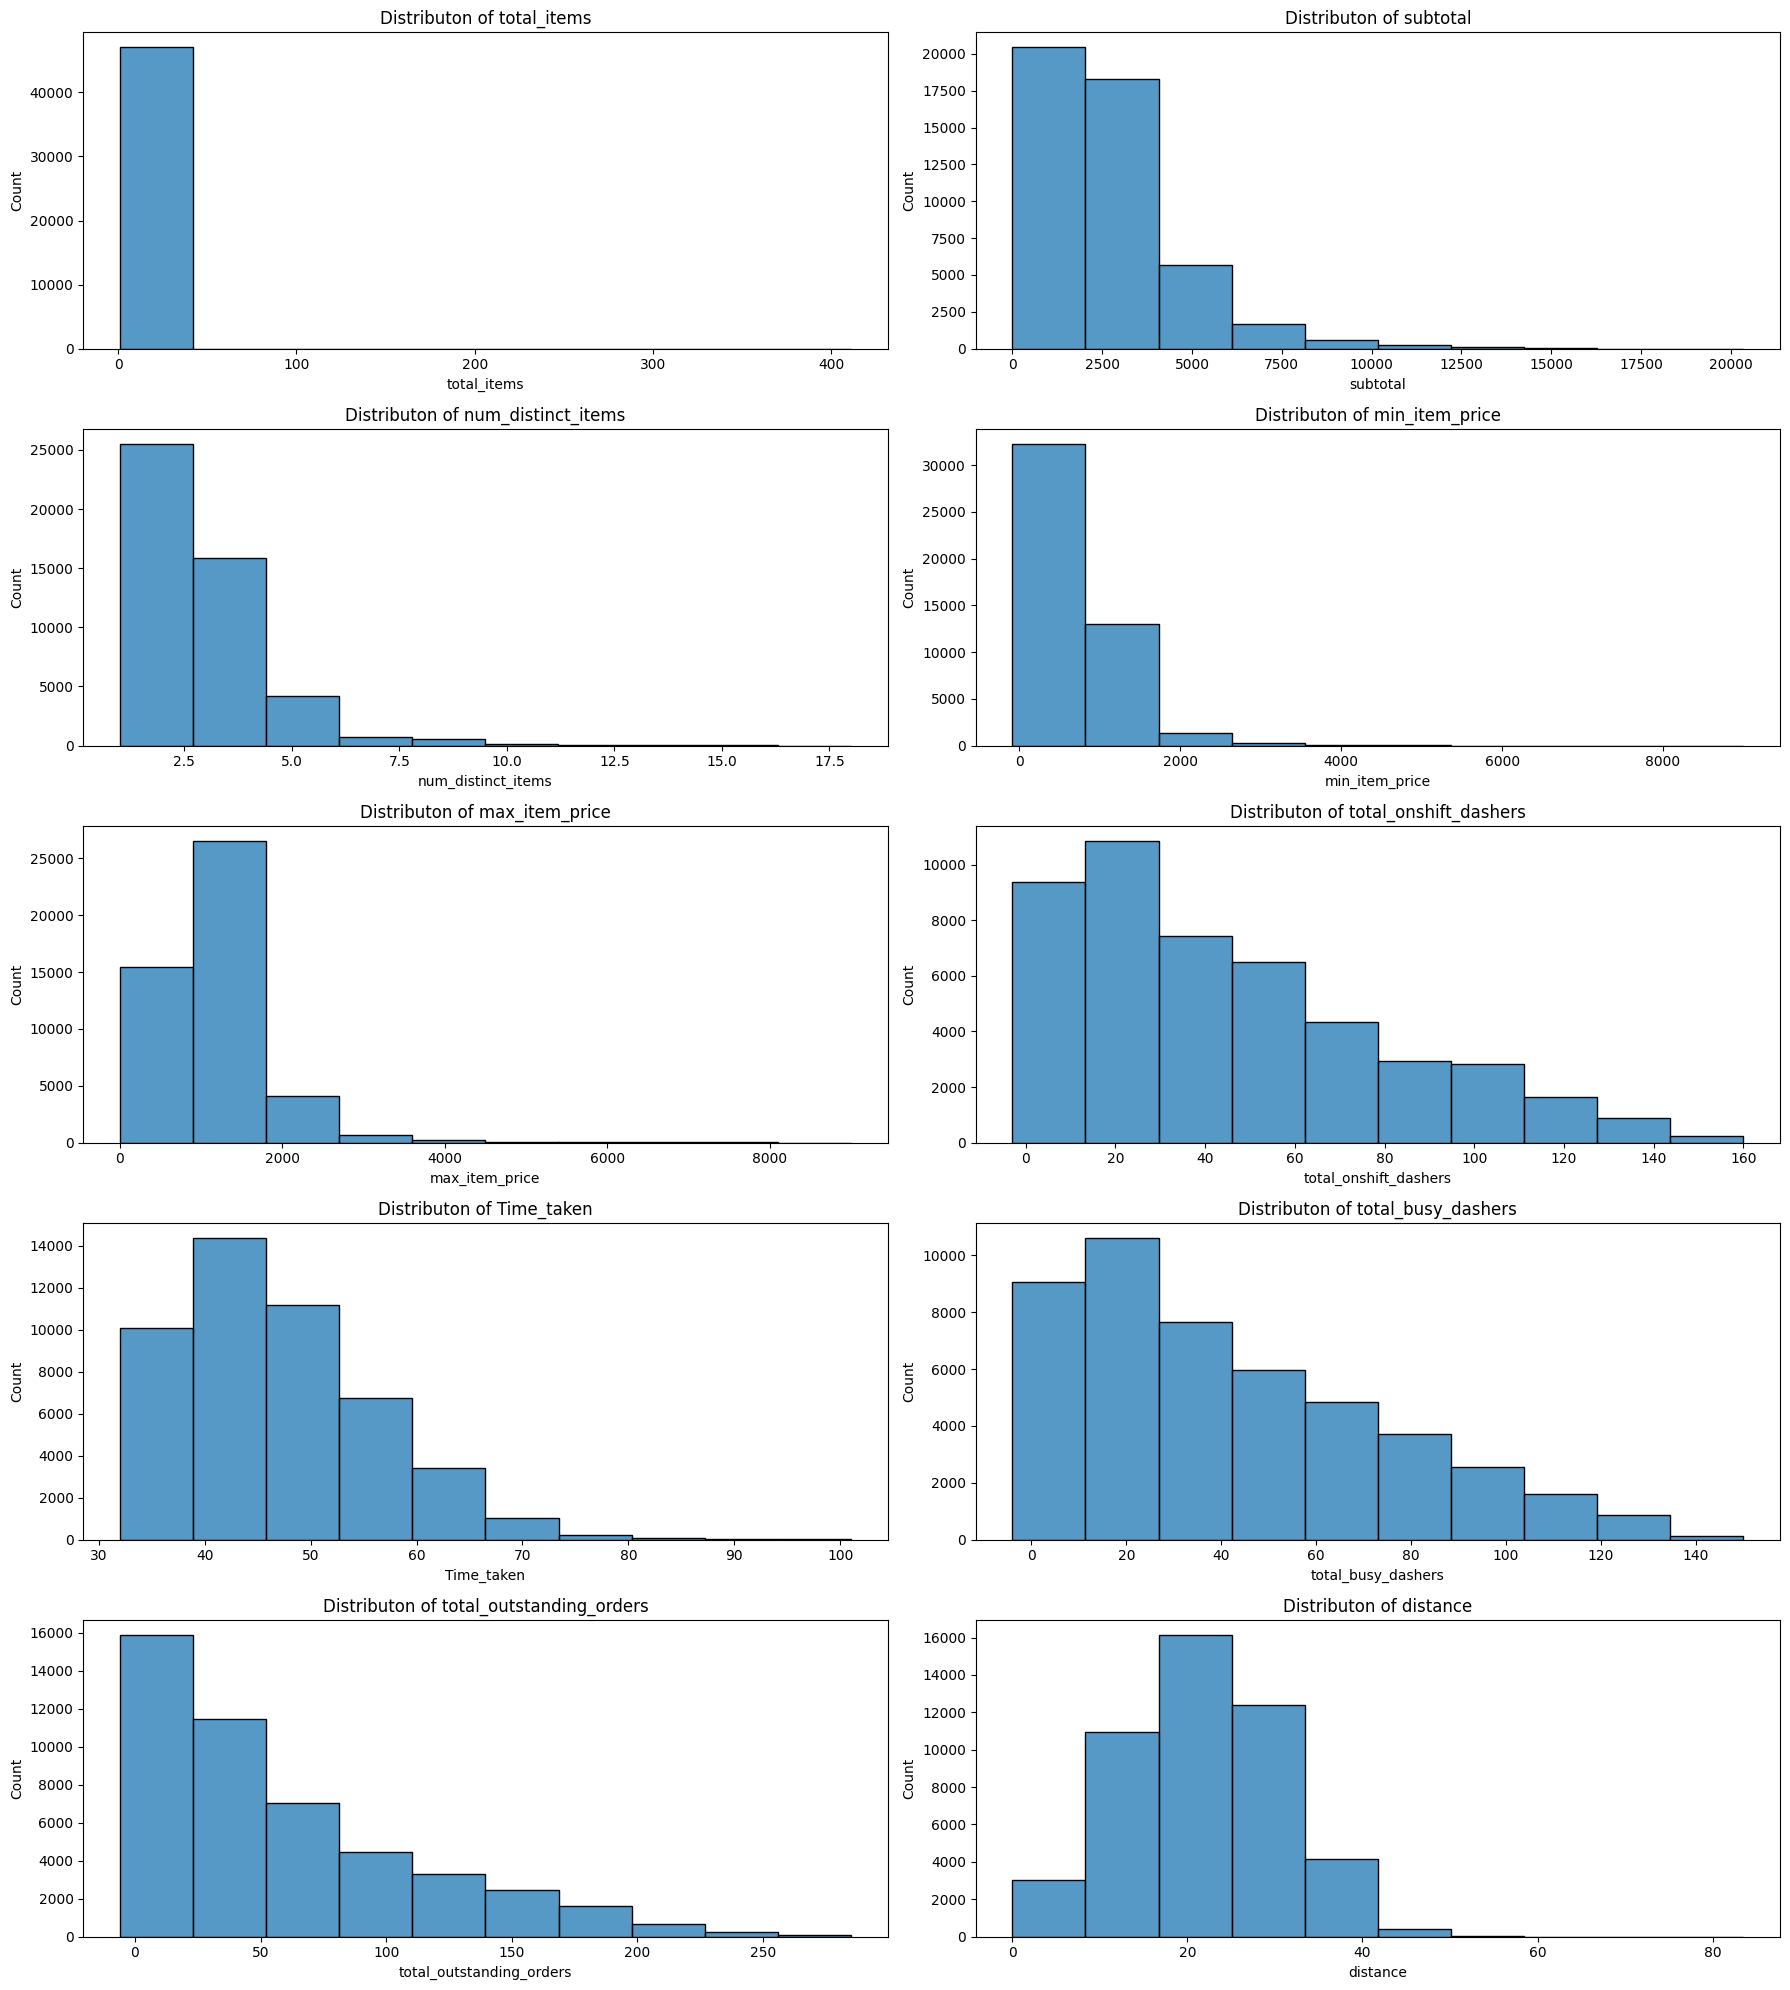

In [ ]:
# Plot distributions for all numerical columns

plt.figure(figsize=(18,20))
for i,col in enumerate(numCols,1):
    plt.subplot(5,2,i)
    sns.histplot(df_train[col],bins=10,palette='#1a80bb')
    plt.title(f'Distributon of {col}')
    plt.tight_layout()


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47047 entries, 17203 to 56422
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   market_id                 47047 non-null  category
 1   store_primary_category    47047 non-null  category
 2   order_protocol            47047 non-null  category
 3   total_items               47047 non-null  int64   
 4   subtotal                  47047 non-null  int64   
 5   num_distinct_items        47047 non-null  int64   
 6   min_item_price            47046 non-null  float64 
 7   max_item_price            47046 non-null  float64 
 8   total_onshift_dashers     47046 non-null  float64 
 9   total_busy_dashers        47046 non-null  float64 
 10  total_outstanding_orders  47046 non-null  float64 
 11  distance                  47046 non-null  float64 
 12  Time_taken                47047 non-null  float64 
 13  Order_hours               47047 non-null  int64

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

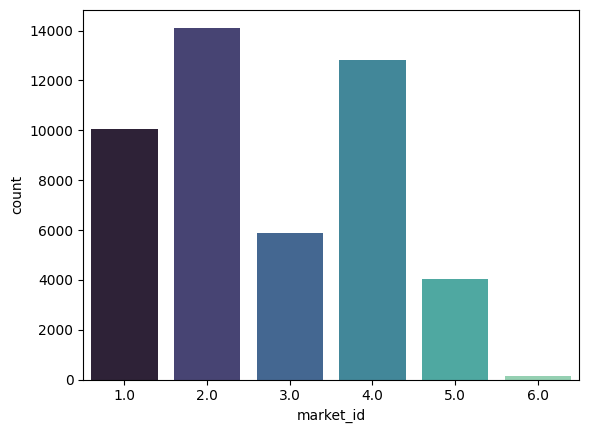

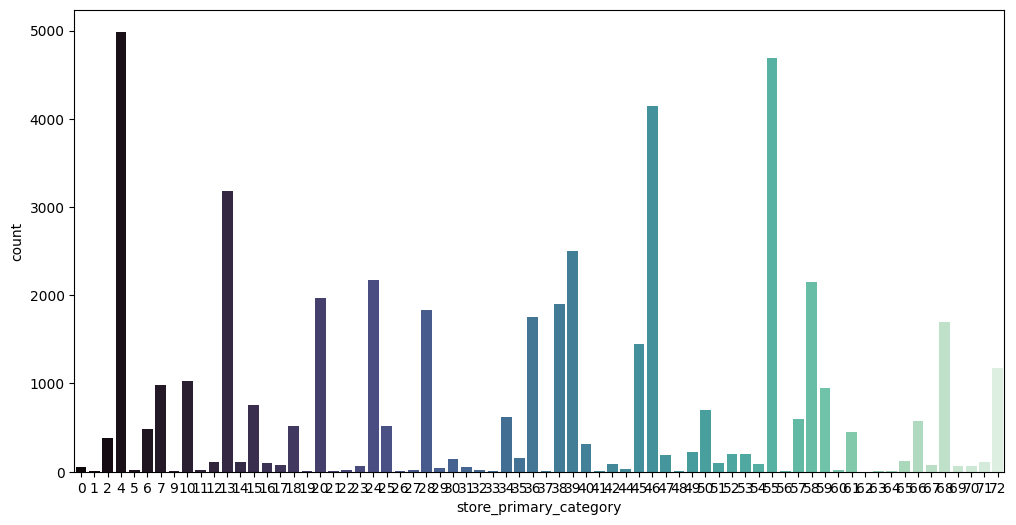

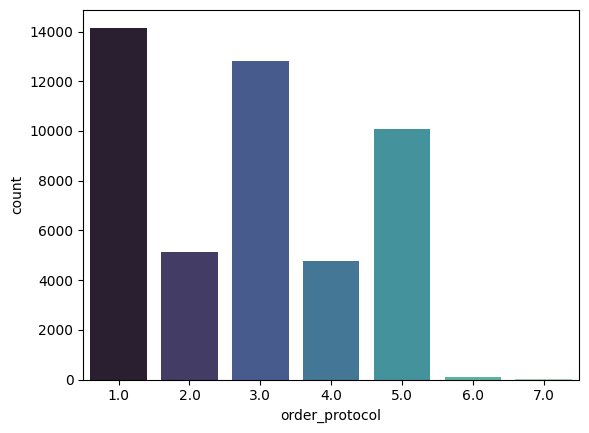

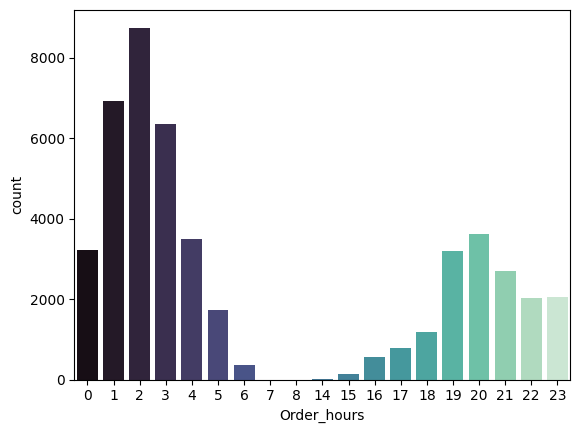

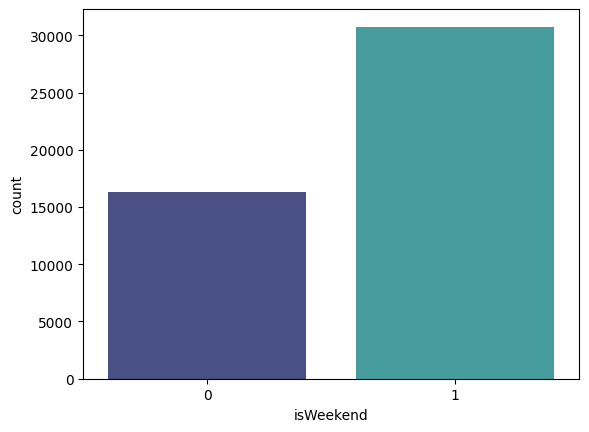

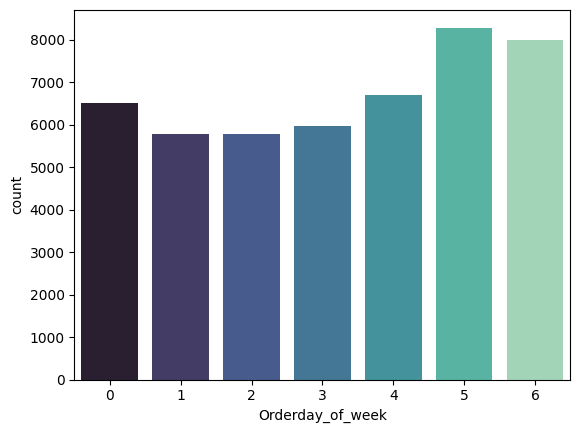

In [ ]:
# Distribution of categorical columns

for col in categoryCols:
    if col == 'store_primary_category':
        plt.figure(figsize=(12,6))
    sns.countplot(x=df_train[col],palette='mako')
    plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

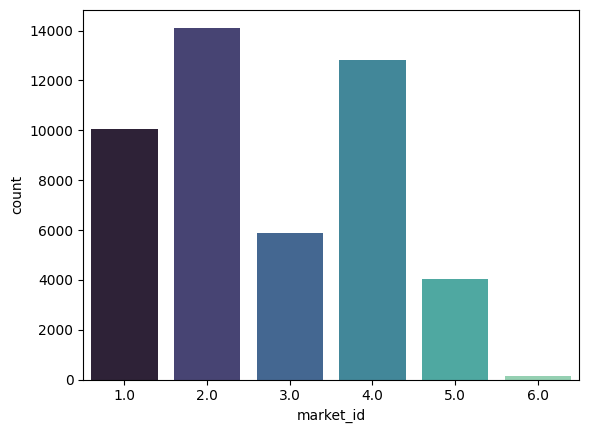

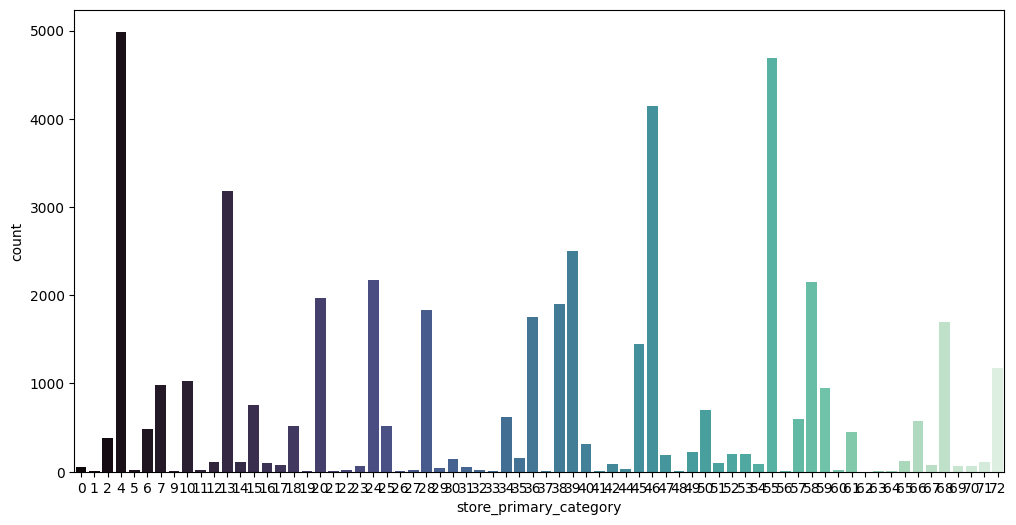

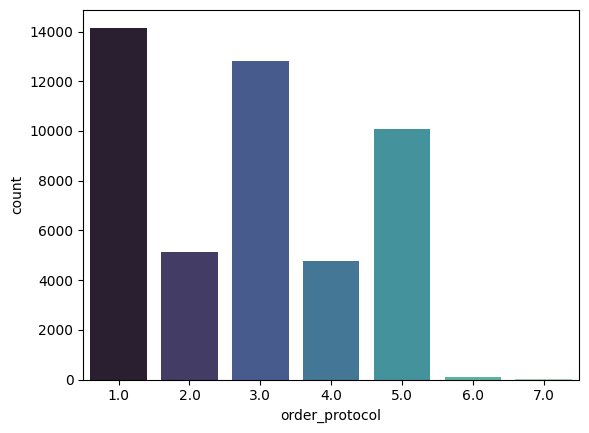

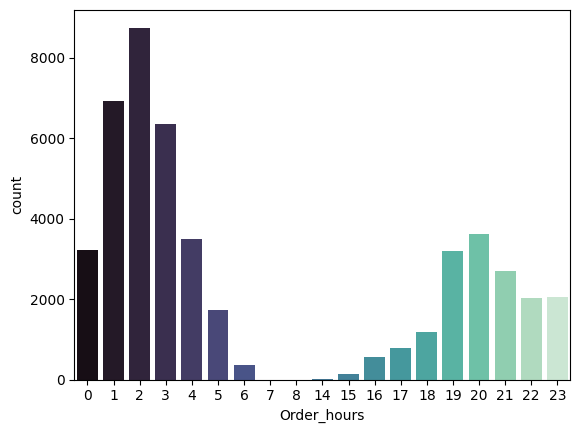

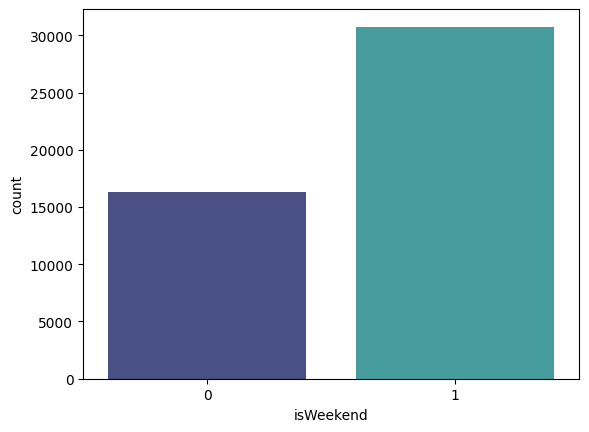

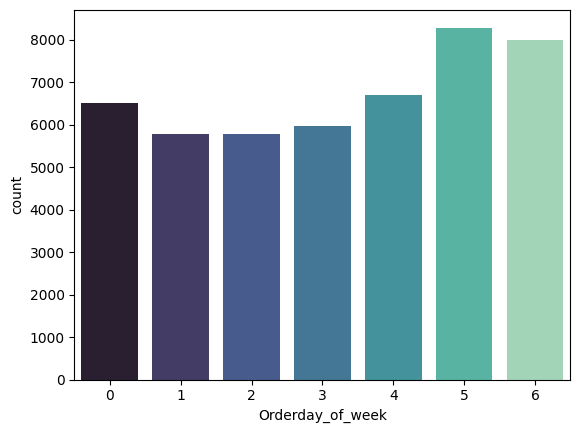

In [ ]:
# Distribution of time_taken

for col in categoryCols:
    if col == 'store_primary_category':
        plt.figure(figsize=(12,6))
    sns.countplot(x=df_train[col],palette='mako')
    plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

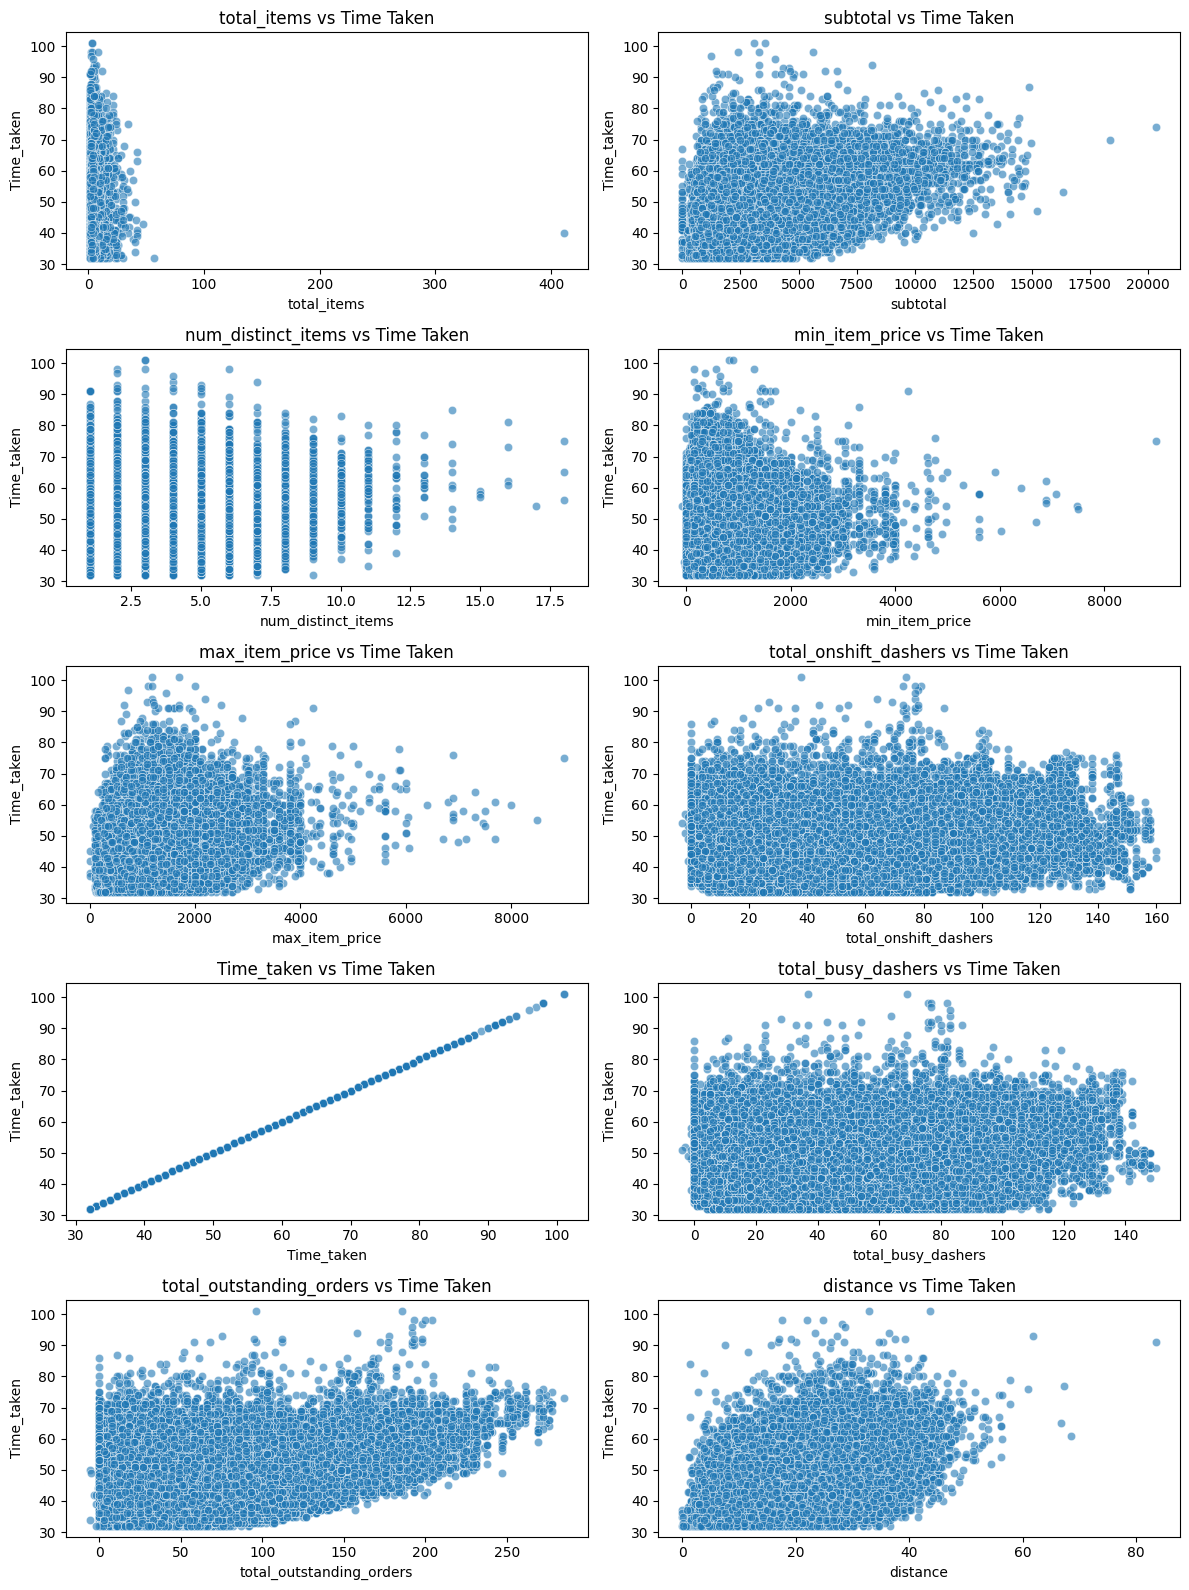

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features

plt.figure(figsize=(12,16))
for i,col in enumerate(numCols,1):
    plt.subplot(5,2,i)
    sns.scatterplot(data=df_train, x=col ,y='Time_taken',alpha=0.6)
    plt.title(f'{col} vs Time Taken')
    plt.tight_layout()
plt.show()

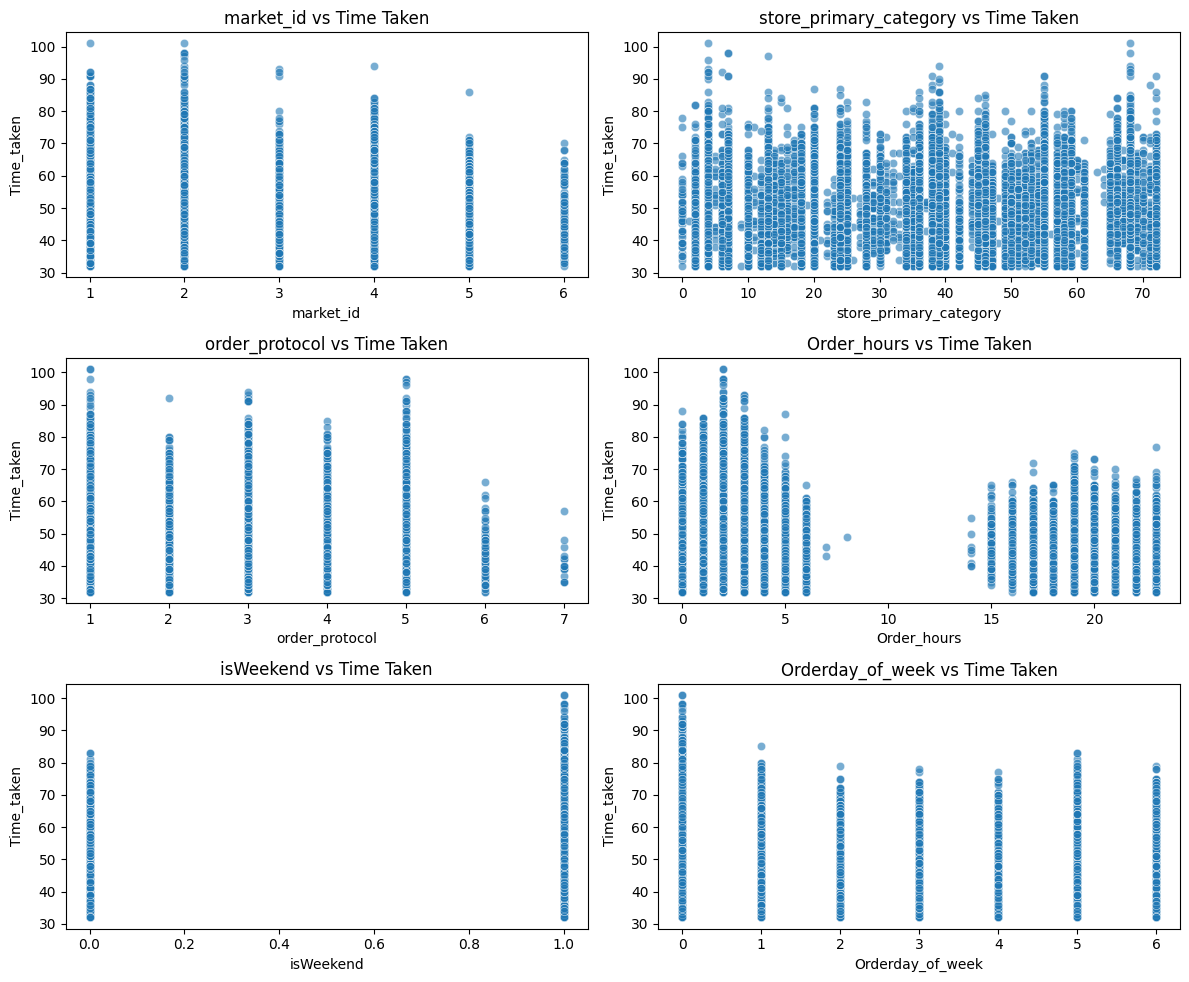

In [ ]:
plt.figure(figsize=(12,16))
for i,col in enumerate(categoryCols,1):
    plt.subplot(5,2,i)
    sns.scatterplot(data=df_train, x=col ,y='Time_taken',alpha=0.6)
    plt.title(f'{col} vs Time Taken')
    plt.tight_layout()
plt.show()

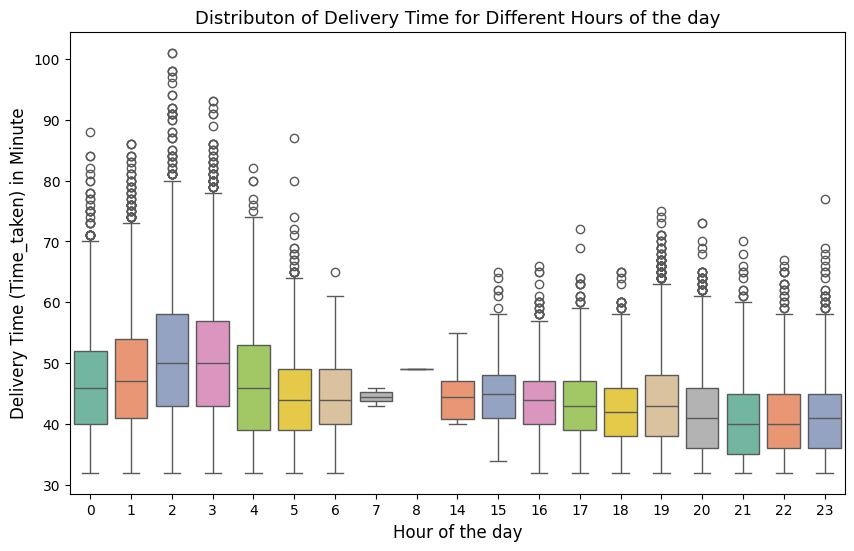

In [ ]:
# Show the distribution of time_taken for different hours

plt.figure(figsize=(10,6))
sns.boxplot(x=df_train['Order_hours'],y=df_train['Time_taken'],data=df_train,palette="Set2")
plt.title('Distributon of Delivery Time for Different Hours of the day',fontsize=13)
plt.xlabel("Hour of the day",fontsize=12)
plt.ylabel("Delivery Time (Time_taken) in Minute",fontsize=12)
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

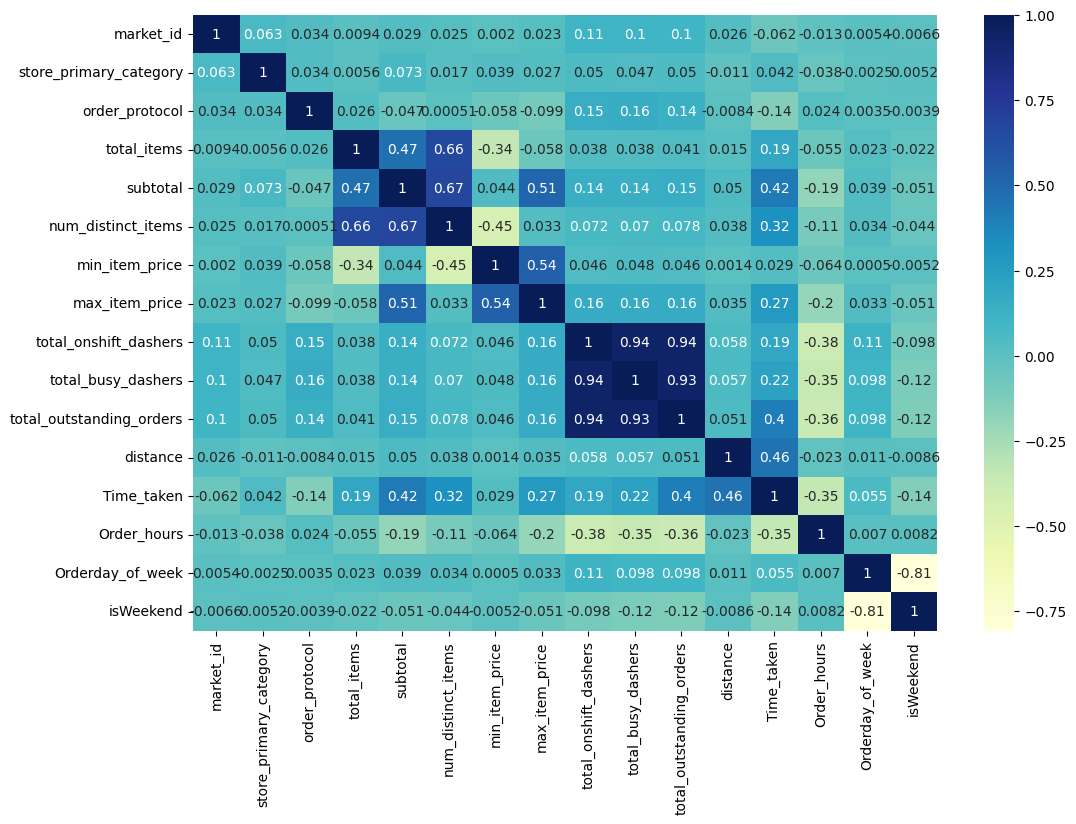

In [ ]:
# Plot the heatmap of the correlation matrix

plt.figure(figsize=(12,8))
sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu')
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [ ]:
# Drop 3-5 weakly correlated columns from training dataset

df_train.corr()['Time_taken'].sort_values(ascending=False)

Time_taken                  1.000000
distance                    0.458758
subtotal                    0.424984
total_outstanding_orders    0.401754
num_distinct_items          0.317164
max_item_price              0.266217
total_busy_dashers          0.224955
total_items                 0.191386
total_onshift_dashers       0.188358
Orderday_of_week            0.054918
store_primary_category      0.042045
min_item_price              0.028742
market_id                  -0.061775
order_protocol             -0.141355
isWeekend                  -0.142065
Order_hours                -0.345669
Name: Time_taken, dtype: float64

In [ ]:
WeakCorrCol= ['store_primary_category','min_item_price','Orderday_of_week','Order_hours']
df_train.drop(WeakCorrCol,axis=1,inplace=True)

numCols=[c for c in numCols if c not in WeakCorrCol]
categoryCols=[c for c in categoryCols if c not in WeakCorrCol]


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

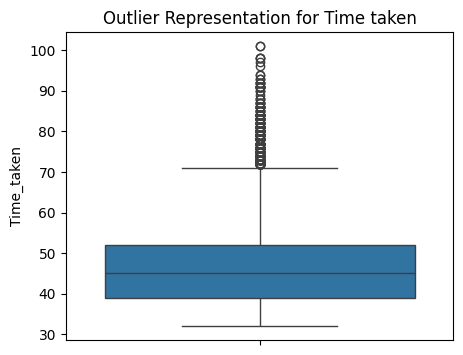

In [ ]:
# Boxplot for time_taken

plt.figure(figsize=(5,4))
sns.boxplot(y=df_train['Time_taken'])
plt.title('Outlier Representation for Time taken')
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

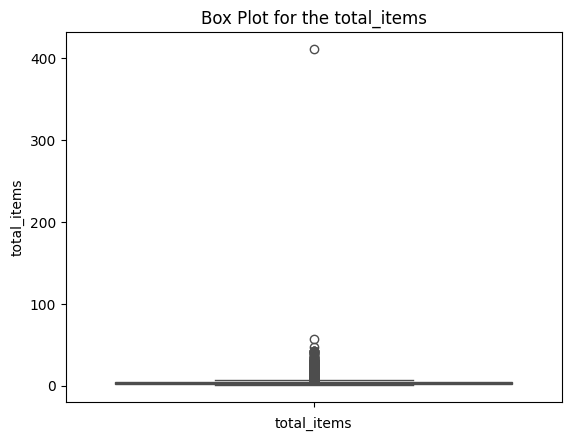

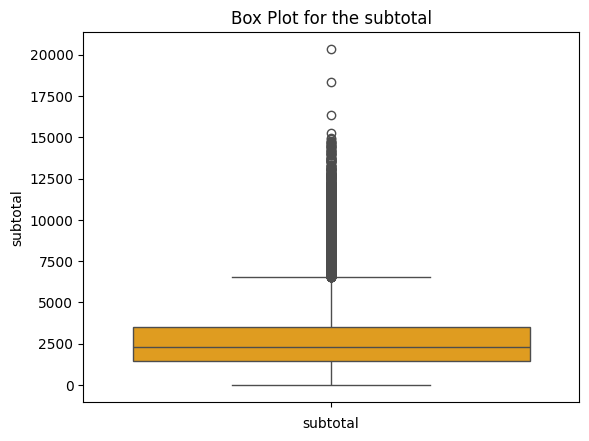

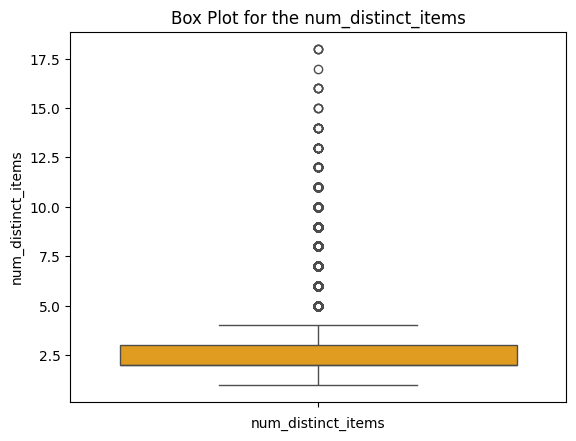

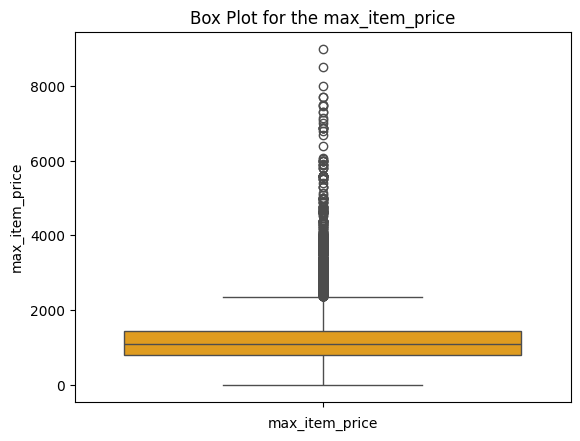

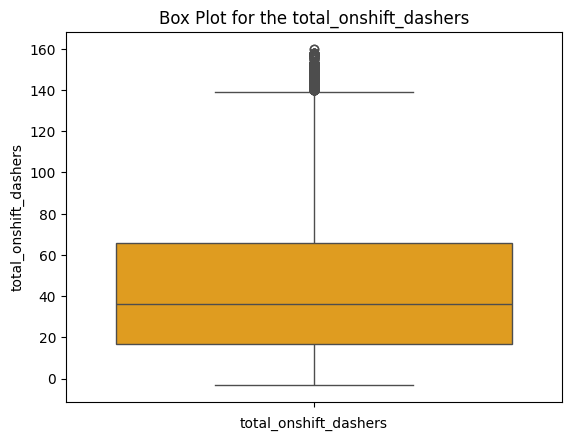

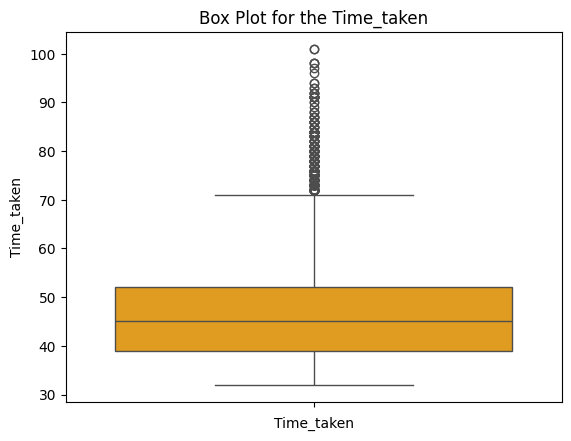

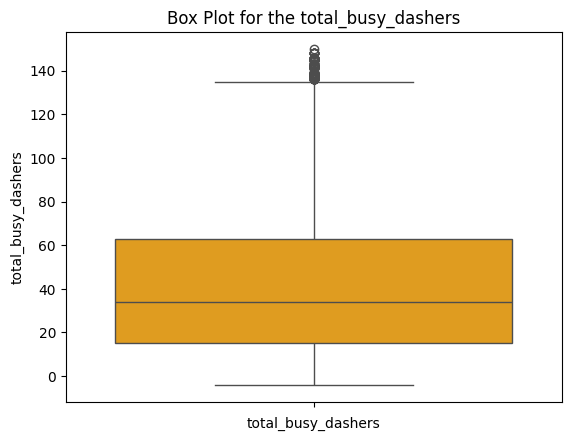

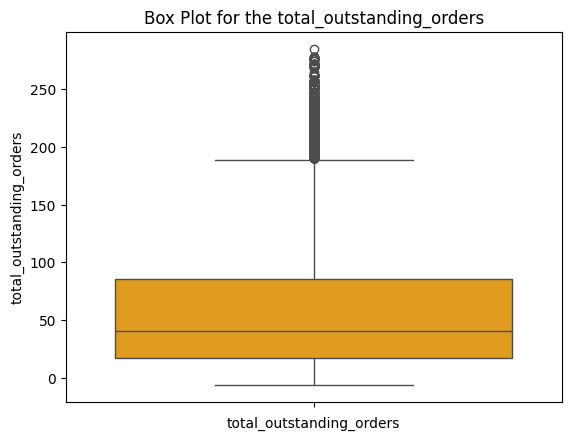

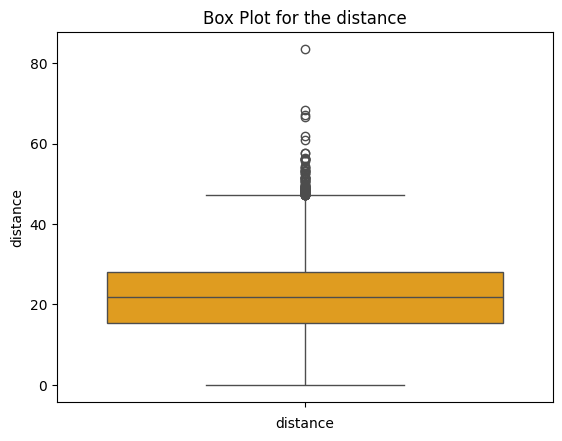

In [ ]:
for col in numCols:
    sns.boxplot(data=df_train, y=df_train[col],color='orange')
    plt.title(f"Box Plot for the {col}")
    plt.xlabel(col)
    plt.show()

In [ ]:
# Handle outliers

def remove_outliers(df,columns,multiplier=1.5):
    df_clean=df.copy()
    for col in columns:
        Q1=df_clean[col].quantile(0.25)
        Q3=df_clean[col].quantile(0.75)
        IQR=Q3-Q1
        lower_bound=Q1-multiplier*IQR
        upper_bound=Q3+multiplier*IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

def handle_InvalidData(df):
    #Observation:
    #1.we have certain row with subtotal as 0 and total_items > 0 , so it looks like invalid data
    df = df[df['subtotal'] > 0]
    #2.we have certain row with max_item_price less than 0 , so it looks like invalid data
    df = df[df['max_item_price'] > 0]
    #3.we have certain row with total_onshift_dashers less than 0 , so it looks like invalid data
    df = df[df['total_onshift_dashers'] >= 0]
    #4.we have certain row with total_busy_dashers less than 0 , so it looks like invalid data
    df = df[df['total_busy_dashers'] >= 0]
    #5.we have certain row with total_outstanding_orders less than 0 , so it looks like invalid data
    df = df[df['total_outstanding_orders'] >= 0]
    #6.we have certain row with distance less than 0 , so it looks like invalid data
    df = df[df['distance'] > 0]
    #7.we have certain row with total_onshift_dashers less than total_busy_dashers , so it looks like invalid data
    df = df[df['total_onshift_dashers'] >=  df['total_busy_dashers']]
    return df

In [ ]:
df_train=handle_InvalidData(df_train)


outlier_col=['distance','subtotal','total_outstanding_orders','max_item_price','total_items','total_busy_dashers','total_onshift_dashers','Time_taken']
df_train=remove_outliers(df_train,outlier_col,1.5)

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation

numCols=['total_items','subtotal', 'num_distinct_items', 'max_item_price',
         'total_onshift_dashers', 'Time_taken', 'total_busy_dashers', 'total_outstanding_orders', 'distance']

categoryCols = ['market_id', 'order_protocol', 'isWeekend']

#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

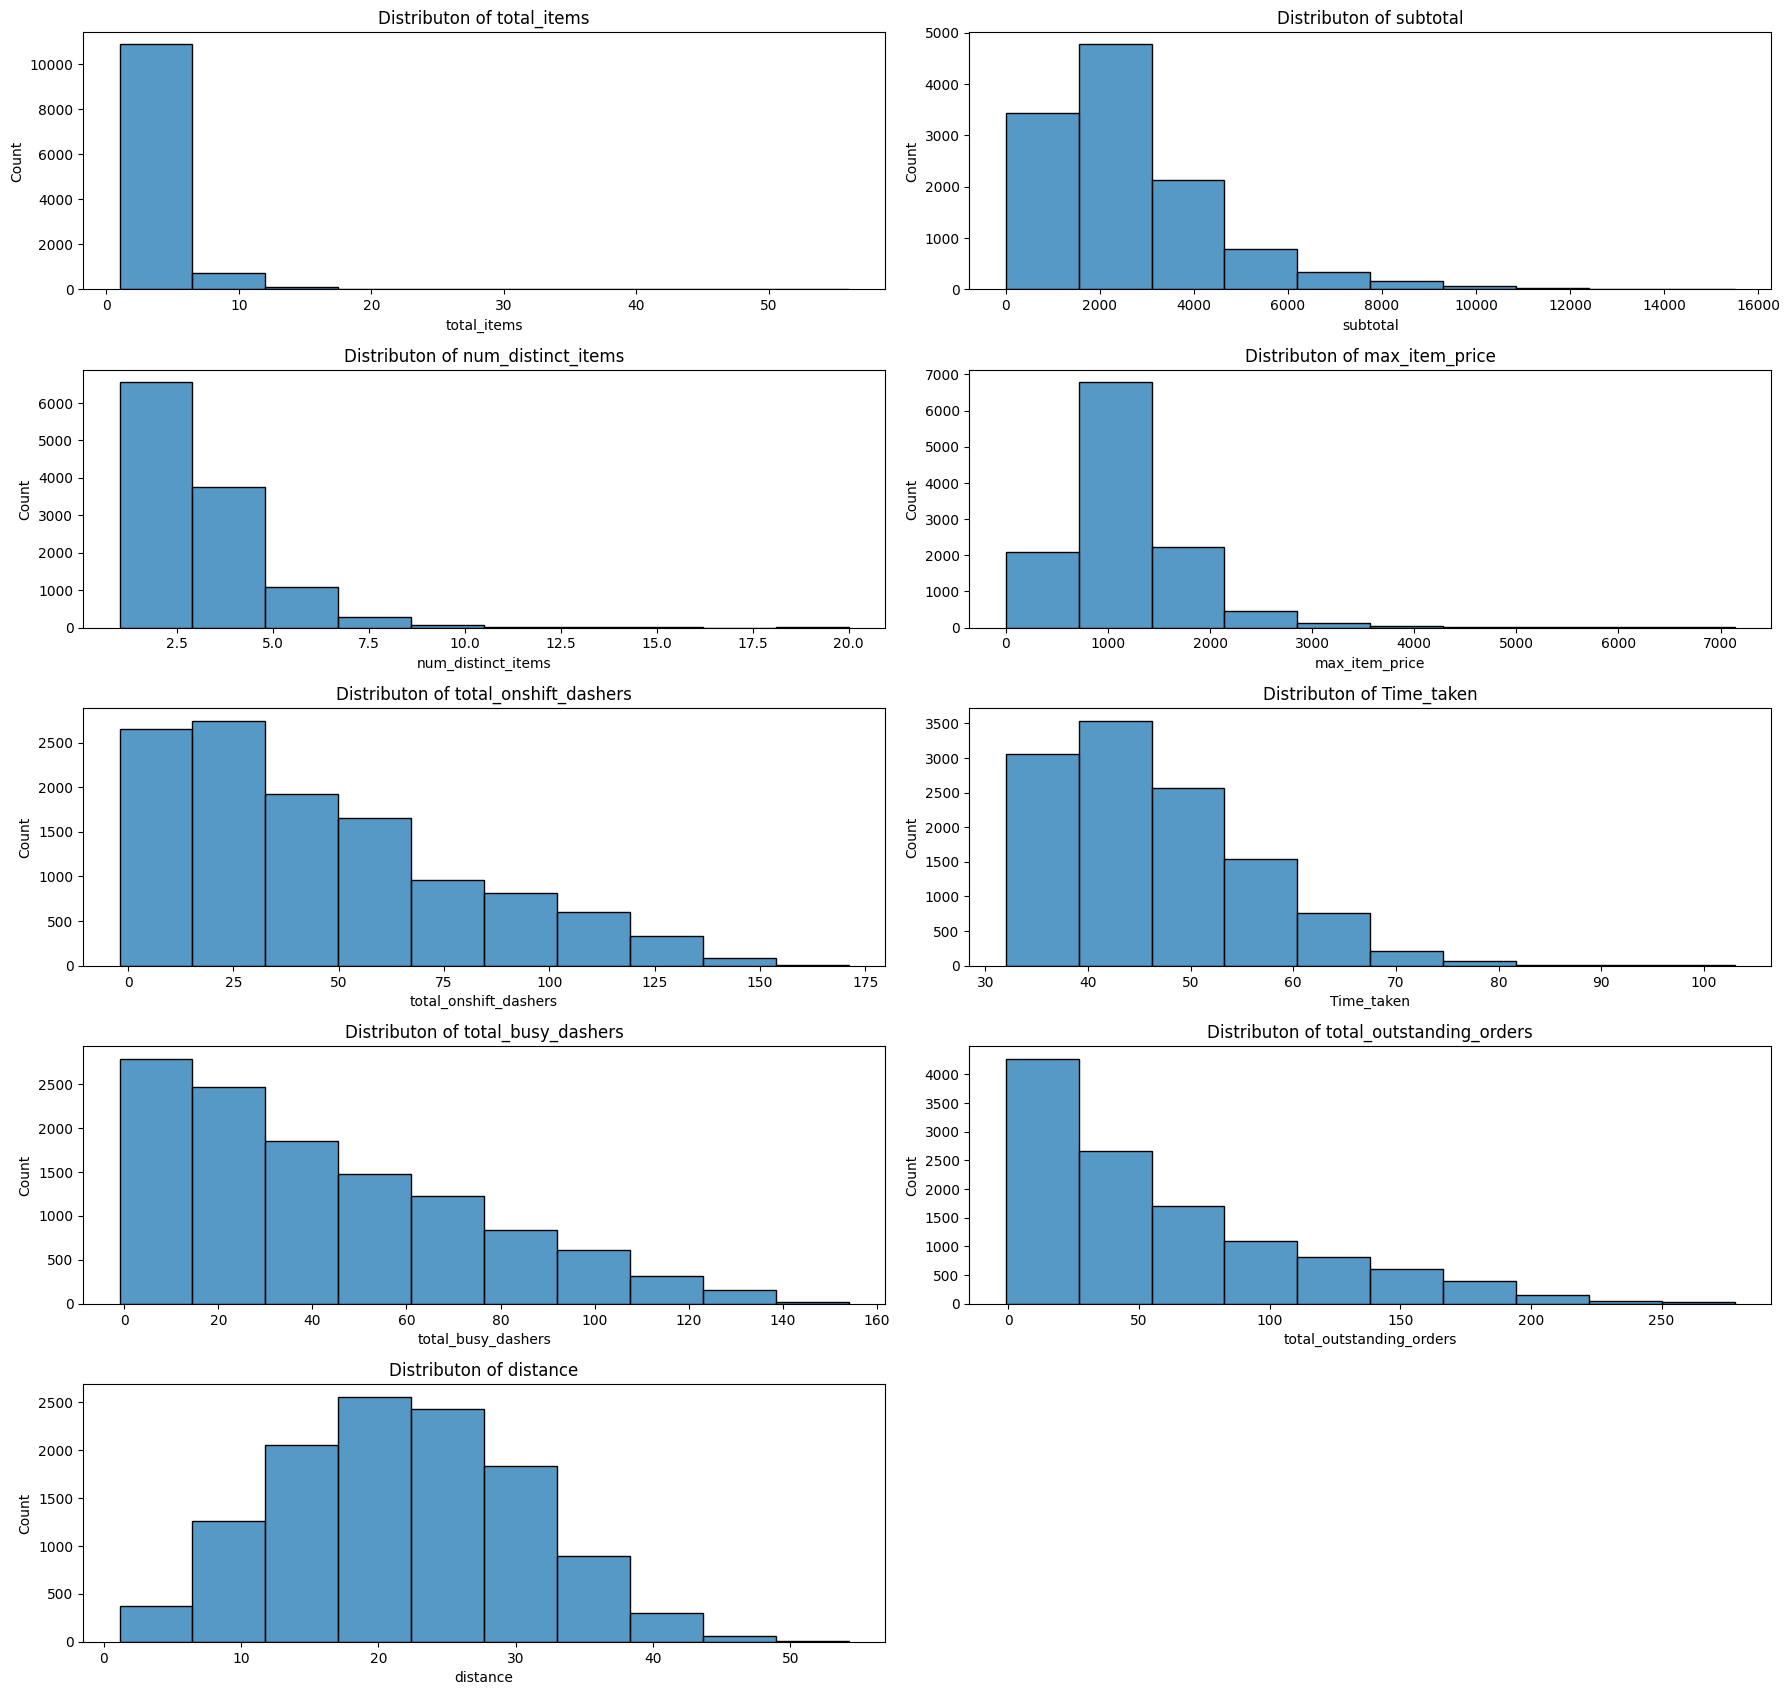

In [ ]:
# Plot distributions for all numerical columns

plt.figure(figsize=(18,20))

for i,col in enumerate(numCols,1):
    plt.subplot(6,2,i)
    sns.histplot(df_test[col],bins=10,palette='#1a80bb')
    plt.title(f'Distributon of {col}')
    plt.tight_layout()

##### **4.1.2**
Check the distribution of categorical features

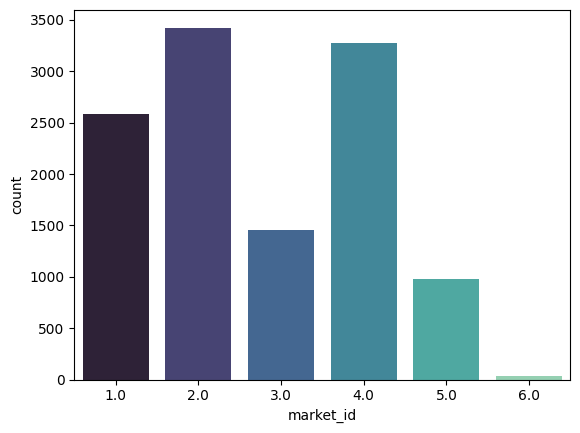

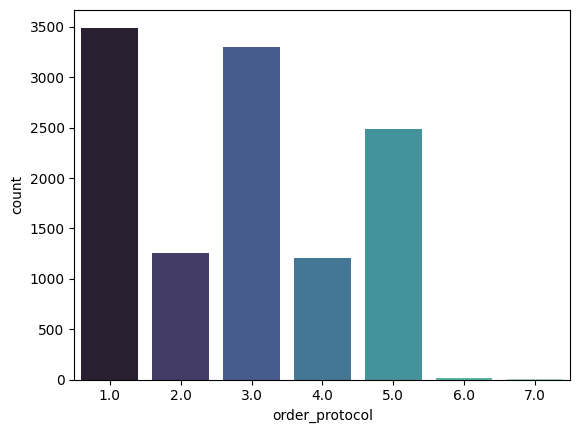

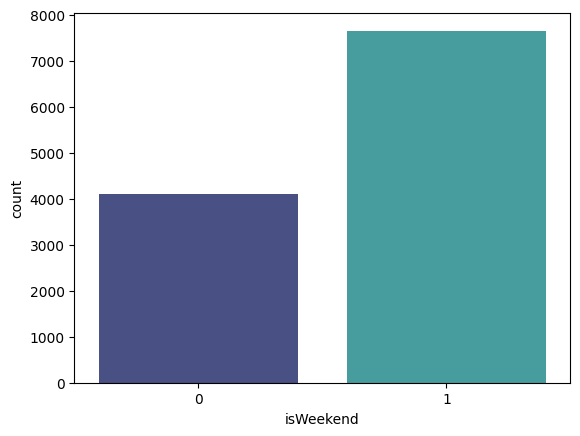

In [ ]:
# Distribution of categorical columns

for col in categoryCols:
    sns.countplot(x=df_test[col],palette='mako')
    plt.show()

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

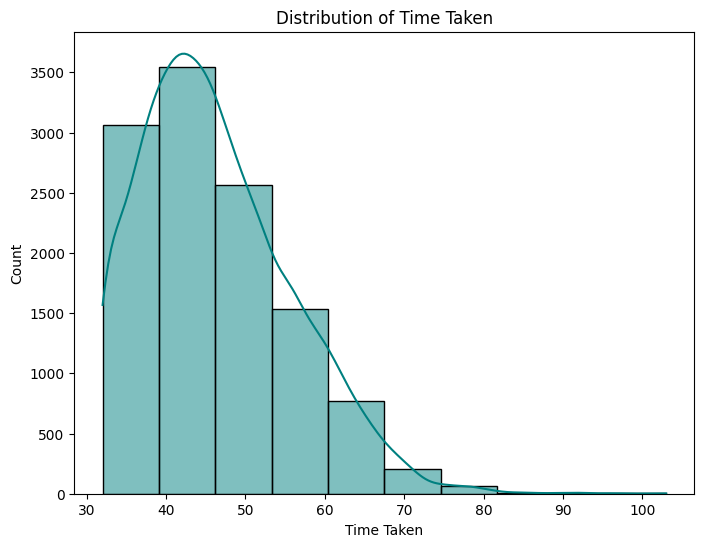

In [ ]:
# Distribution of time_taken

plt.figure(figsize=(8,6))
sns.histplot(df_test['Time_taken'],kde=True, bins=10,color="teal")
plt.title("Distribution of Time Taken")
plt.xlabel("Time Taken")
plt.ylabel("Count")
plt.show()


#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

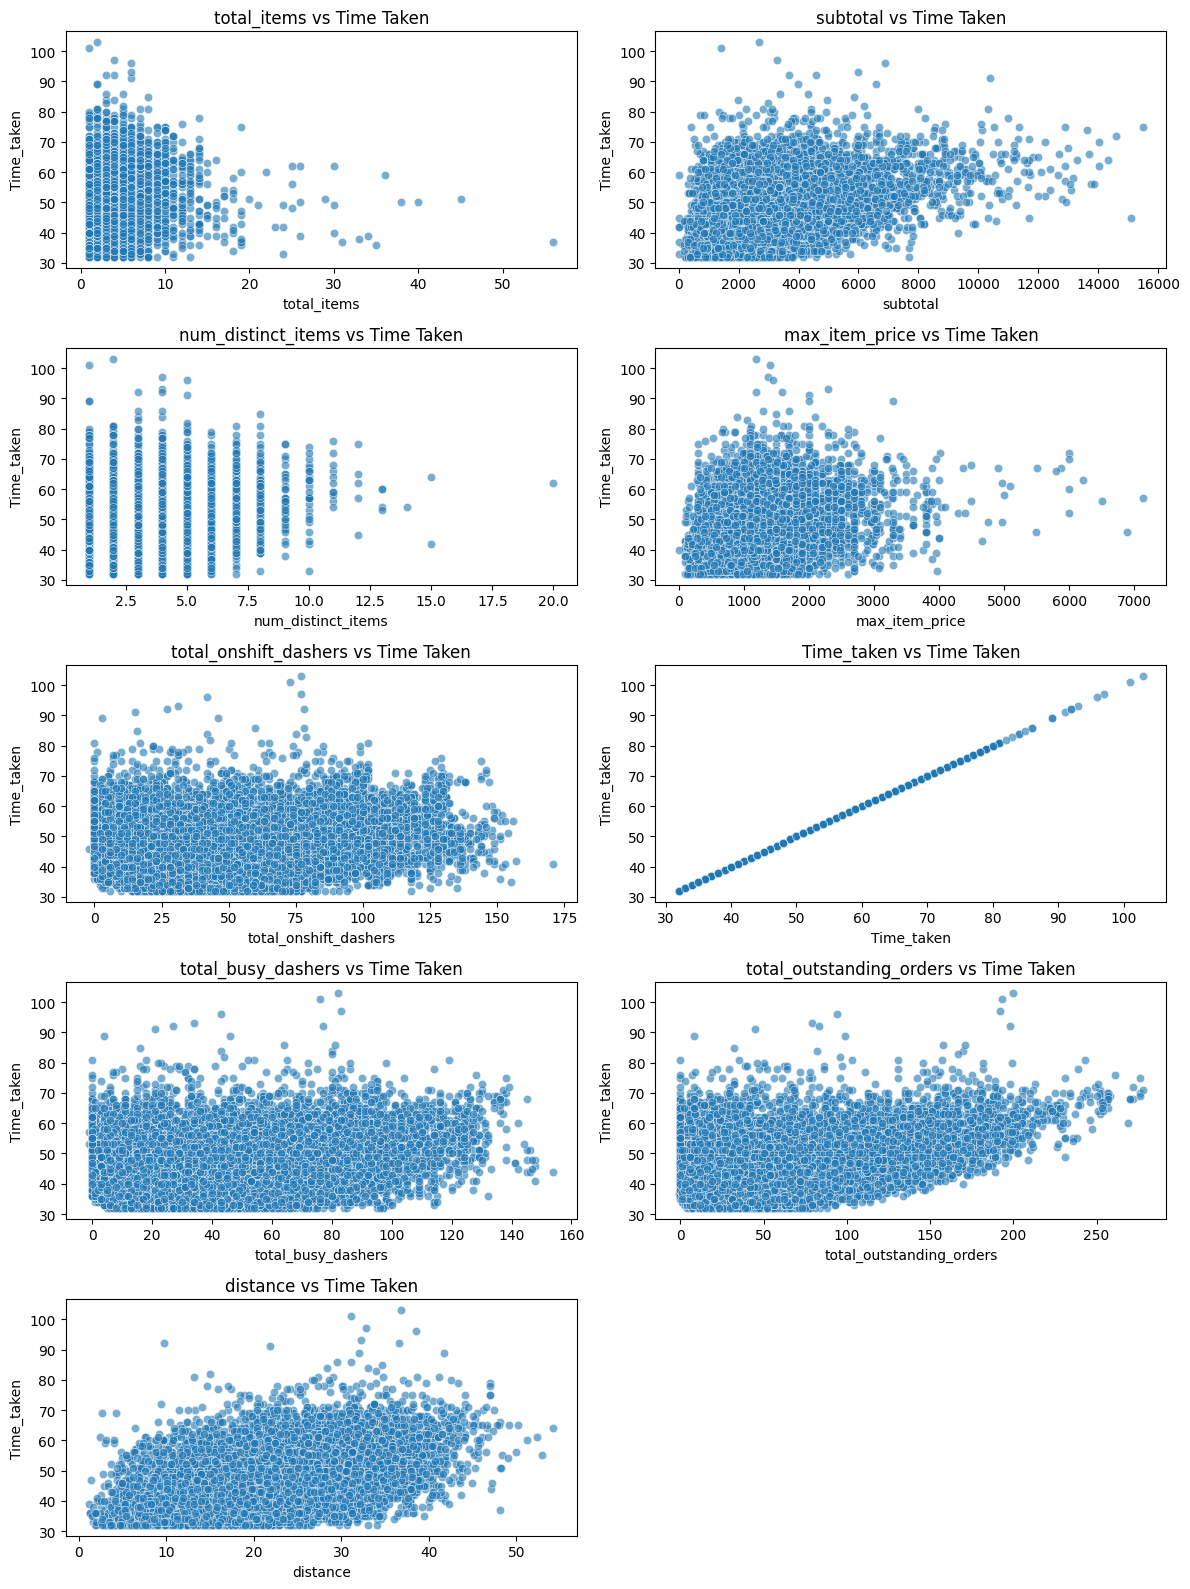

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features

plt.figure(figsize=(12,16))
for i,col in enumerate(numCols,1):
    plt.subplot(5,2,i)
    sns.scatterplot(data=df_test,x =col,y='Time_taken',alpha=0.6)
    plt.title(f"{ col } vs Time Taken")
    plt.tight_layout()
plt.show()


#### **4.3** Drop the columns with weak correlations with the target variable

In [ ]:
# Drop the weakly correlated columns from training dataset

weakCorrCol = ['store_primary_category','min_item_price','Order_hours','Orderday_of_week']
df_test.drop(weakCorrCol,axis=1,inplace=True)


## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [ ]:
# Import libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [ ]:
# Apply scaling to the numerical columns

def addDummies(df, columns):
    df = df.copy()  # optional: prevents modifying original df
    for col in columns:
        dummies = pd.get_dummies(df[col], prefix=col, dtype=int, drop_first=True)
        df = pd.concat([df.drop(columns=[col]), dummies], axis=1)
    return df

In [ ]:
df_train =addDummies(df_train,categoryCols)
df_test =addDummies(df_test,categoryCols)

In [ ]:
df_test

total_items  subtotal  num_distinct_items  max_item_price  \
34572            3      2523                   3           908.0   
28498            3      2350                   3          1100.0   
26501            3      1941                   3           891.0   
40552            1      1700                   1          1700.0   
29446            3      2675                   3          1050.0   
...            ...       ...                 ...             ...   
25636            2      2550                   1           975.0   
46829            4      4090                   4          1525.0   
47503            3      4285                   3          1295.0   
43946            3      1310                   2           550.0   
26388            1       805                   1           805.0   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
34572                   22.0                13.0                      13.0   
28498                   19.0                21.0                      23.0   
26501                   80.0                69.0                      91.0   
40552                    4.0                 8.0                       9.0   
29446                   15.0                15.0                      18.0   
...                      ...                 ...                       ...   
25636                   83.0                80.0                     121.0   
46829                   59.0                43.0                      43.0   
47503                    6.0                 6.0                       6.0   
43946                   17.0                17.0                      20.0   
26388                   82.0                58.0                      62.0   

       distance  Time_taken  market_id_2.0  ...  market_id_4.0  market_id_5.0  \
34572      6.52        32.0              1  ...              0              0   
28498     21.56        47.0              0  ...              0              0   
26501     26.36        40.0              1  ...              0              0   
40552     38.28        62.0              0  ...              0              0   
29446     17.68        48.0              0  ...              0              1   
...         ...         ...            ...  ...            ...            ...   
25636     25.04        51.0              1  ...              0              0   
46829     20.28        34.0              0  ...              0              0   
47503      6.68        45.0              0  ...              0              0   
43946      5.36        35.0              0  ...              0              0   
26388     29.20        35.0              1  ...              0              0   

       market_id_6.0  order_protocol_2.0  order_protocol_3.0  \
34572              0                   0                   0   
28498              0                   0                   1   
26501              0                   0                   1   
40552              0                   1                   0   
29446              0                   0                   0   
...              ...                 ...                 ...   
25636              0                   0                   1   
46829              0                   0                   0   
47503              0                   0                   0   
43946              1                   0                   0   
26388              0                   0                   0   

       order_protocol_4.0  order_protocol_5.0  order_protocol_6.0  \
34572                   0                   0                   0   
28498                   0                   0                   0   
26501                   0                   0                   0   
40552                   0                   0                   0   
29446                   0                   0                   0   
...                   ...                 ...                 ...   
25636                   0   

In [ ]:
y_train_unscaled=df_train['Time_taken']
X_train_unsacaled=df_train.drop(columns=['Time_taken'])

In [ ]:
y_test_unscaled = df_test['Time_taken']
X_test_unscaled = df_test.drop(columns=['Time_taken'])

X_unscaled_const = sm.add_constant(X_train_unsacaled)
model_unscaled = sm.OLS(y_train_unscaled, X_unscaled_const).fit()

coeffs_unscaled = model_unscaled.params
print("Unscaled Coefficients:\n", coeffs_unscaled)

Unscaled Coefficients:
 const                       34.893753
total_items                 -0.076268
subtotal                     0.001356
num_distinct_items           0.613381
max_item_price               0.001087
total_onshift_dashers       -0.280357
total_busy_dashers          -0.215409
total_outstanding_orders     0.371636
distance                     0.471512
market_id_2.0               -5.284255
market_id_3.0               -3.725909
market_id_4.0               -4.565292
market_id_5.0               -3.200440
market_id_6.0               -2.613820
order_protocol_2.0          -0.850824
order_protocol_3.0          -1.491138
order_protocol_4.0          -1.745101
order_protocol_5.0          -2.864805
order_protocol_6.0          -1.867798
order_protocol_7.0          -1.919310
isWeekend_1                 -1.194026
dtype: float64


In [ ]:
scaler = MinMaxScaler()
num_vars =numCols
num_vars.append('Time_taken')

num_vars

['total_items',
 'subtotal',
 'num_distinct_items',
 'max_item_price',
 'total_onshift_dashers',
 'Time_taken',
 'total_busy_dashers',
 'total_outstanding_orders',
 'distance',
 'Time_taken']

In [ ]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.transform(df_test[num_vars])

y_train = df_train['Time_taken']
X_train = df_train.drop(columns=['Time_taken'])

y_test = df_test['Time_taken']
X_test = df_test.drop(columns=['Time_taken'])

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [ ]:
# Create/Initialise the model

X_train_scaled_const  = sm.add_constant(X_train)
X_test_scaled_const = sm.add_constant(X_test)


In [ ]:
# Train the model using the training data

model_scaled   = sm.OLS(y_train, X_train_scaled_const).fit()
coeffs_scaled = model_scaled.params


In [ ]:
# Make predictions

y_train_pred = model_scaled.predict(X_train_scaled_const)
y_test_pred = model_scaled.predict(X_test_scaled_const)

In [ ]:
# Find results for evaluation metrics

print("Training R2 Score:", r2_score(y_train, y_train_pred))
print("Test R2 Score:", r2_score(y_test, y_test_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))


Training R2 Score: 0.8708424557008577
Test R2 Score: 0.863158312061304
Test RMSE: 0.1032452027229274


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [ ]:
# Loop through the number of features and test the model

model = LinearRegression()
# Feature Selection using RFE
rfe = RFE(model, n_features_to_select=12)
rfe = rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_]
print("\nSelected Features:")
print(selected_features)



Selected Features:
Index(['subtotal', 'num_distinct_items', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'market_id_2.0',
       'market_id_3.0', 'market_id_4.0', 'market_id_5.0', 'market_id_6.0'],
      dtype='object')


In [ ]:
# Build the final model with selected number of features

X_train_selected = X_train[selected_features]  # Use features selected by RFE or initially all
X_test_selected = X_test[selected_features]

X_train_scaled_const = sm.add_constant(X_train_selected)
X_test_scaled_const = sm.add_constant(X_test_selected)

model = sm.OLS(y_train, X_train_scaled_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Time_taken   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                 1.462e+04
Date:                Sat, 09 Aug 2025   Prob (F-statistic):               0.00
Time:                        11:42:15   Log-Likelihood:                 30231.
No. Observations:               30942   AIC:                        -6.044e+04
Df Residuals:                   30929   BIC:                        -6.033e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [ ]:
def printVIF(df):
    vif =pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by="VIF",ascending=False)
    return vif

In [ ]:
printVIF(X_train_selected)

Features    VIF
4         total_busy_dashers  75.21
3      total_onshift_dashers  46.20
5   total_outstanding_orders  33.57
0                   subtotal  12.70
2             max_item_price  10.22
6                   distance   5.08
1         num_distinct_items   4.67
7              market_id_2.0   2.82
9              market_id_4.0   2.70
8              market_id_3.0   1.51
10             market_id_5.0   1.39
11             market_id_6.0   1.02

In [ ]:
X = X_train_selected.drop('total_busy_dashers',axis=1)  # Use features selected by RFE or initially all
X_test_selected =X_test_selected.drop('total_busy_dashers',axis=1)

X_train_scaled_const = sm.add_constant(X)
X_test_scaled_const = sm.add_constant(X_test_selected)

model2 = sm.OLS(y_train, X_train_scaled_const).fit()
print(model2.summary())
printVIF(X)

                            OLS Regression Results                            
Dep. Variable:             Time_taken   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                 1.349e+04
Date:                Sat, 09 Aug 2025   Prob (F-statistic):               0.00
Time:                        11:43:02   Log-Likelihood:                 28056.
No. Observations:               30942   AIC:                        -5.609e+04
Df Residuals:                   30930   BIC:                        -5.599e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features    VIF
3      total_onshift_dashers  24.82
4   total_outstanding_orders  19.67
0                   subtotal  12.70
2             max_item_price  10.18
5                   distance   5.03
1         num_distinct_items   4.67
6              market_id_2.0   2.81
8              market_id_4.0   2.70
7              market_id_3.0   1.51
9              market_id_5.0   1.38
10             market_id_6.0   1.02

In [ ]:
X = X.drop('total_onshift_dashers',axis=1)  # Use features selected by RFE or initially all
X_test_selected =X_test_selected.drop('total_onshift_dashers',axis=1)

X_train_scaled_const = sm.add_constant(X)
X_test_scaled_const = sm.add_constant(X_test_selected)
model3 = sm.OLS(y_train, X_train_scaled_const).fit()
print(model3.summary())
printVIF(X)

                            OLS Regression Results                            
Dep. Variable:             Time_taken   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     3815.
Date:                Sat, 09 Aug 2025   Prob (F-statistic):               0.00
Time:                        11:43:35   Log-Likelihood:                 13297.
No. Observations:               30942   AIC:                        -2.657e+04
Df Residuals:                   30931   BIC:                        -2.648e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features    VIF
0                  subtotal  12.70
2            max_item_price  10.11
4                  distance   4.98
1        num_distinct_items   4.67
3  total_outstanding_orders   3.25
7             market_id_4.0   2.64
5             market_id_2.0   2.60
6             market_id_3.0   1.51
8             market_id_5.0   1.38
9             market_id_6.0   1.01

In [ ]:
X = X.drop('subtotal',axis=1)  # Use features selected by RFE or initially all
X_test_selected =X_test_selected.drop('subtotal',axis=1)

X_train_scaled_const = sm.add_constant(X)
X_test_scaled_const = sm.add_constant(X_test_selected)

model4 = sm.OLS(y_train, X_train_scaled_const).fit()
print(model4.summary())
printVIF(X)

                            OLS Regression Results                            
Dep. Variable:             Time_taken   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     4016.
Date:                Sat, 09 Aug 2025   Prob (F-statistic):               0.00
Time:                        11:43:50   Log-Likelihood:                 12839.
No. Observations:               30942   AIC:                        -2.566e+04
Df Residuals:                   30932   BIC:                        -2.558e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features   VIF
1            max_item_price  4.99
3                  distance  4.96
2  total_outstanding_orders  3.24
6             market_id_4.0  2.63
4             market_id_2.0  2.59
0        num_distinct_items  2.23
5             market_id_3.0  1.50
7             market_id_5.0  1.37
8             market_id_6.0  1.01

In [ ]:
X = X.drop('max_item_price',axis=1)  # Use features selected by RFE or initially all
X_test_selected =X_test_selected.drop('max_item_price',axis=1)

X_train_scaled_const = sm.add_constant(X)
X_test_scaled_const = sm.add_constant(X_test_selected)

model5 = sm.OLS(y_train, X_train_scaled_const).fit()
coeffs_scaled =model5.params
print(model5.summary())
printVIF(X)

                            OLS Regression Results                            
Dep. Variable:             Time_taken   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     4102.
Date:                Sat, 09 Aug 2025   Prob (F-statistic):               0.00
Time:                        11:44:03   Log-Likelihood:                 12052.
No. Observations:               30942   AIC:                        -2.409e+04
Df Residuals:                   30933   BIC:                        -2.401e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Features   VIF
2                  distance  3.96
1  total_outstanding_orders  3.09
3             market_id_2.0  2.53
5             market_id_4.0  2.53
0        num_distinct_items  2.14
4             market_id_3.0  1.44
6             market_id_5.0  1.32
7             market_id_6.0  1.01

In [ ]:
y_train_pred = model5.predict(X_train_scaled_const)
y_test_pred = model5.predict(X_test_scaled_const)

print("\n--- Final Model Performance ---")
print("Train RMSE:",np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test RMSE:",np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Test R²:", r2_score(y_test, y_test_pred))


--- Final Model Performance ---
Train RMSE: 0.16390901685273604
Train R²: 0.5147643314322256
Test RMSE: 0.19145605848082745
Test R²: 0.5294379626515704


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

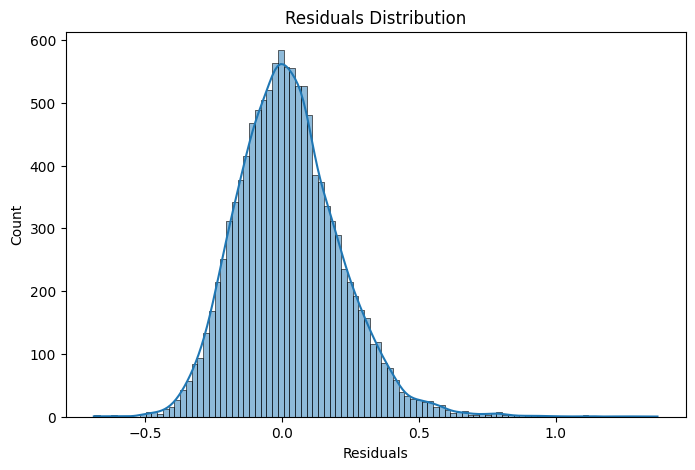

In [ ]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

residuals = y_test - y_test_pred
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.show()


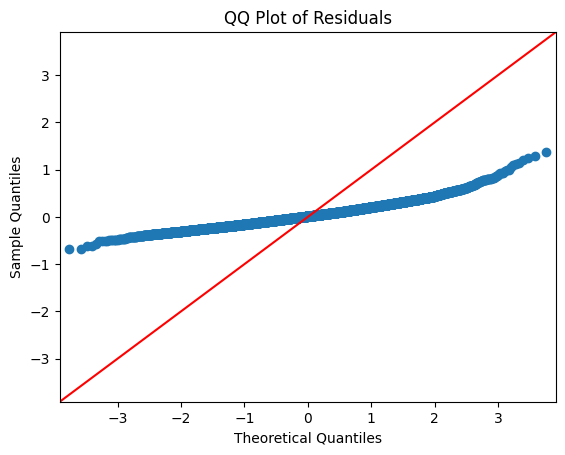

In [ ]:
sm.qqplot(residuals, line='45')
plt.title("QQ Plot of Residuals")
plt.show()

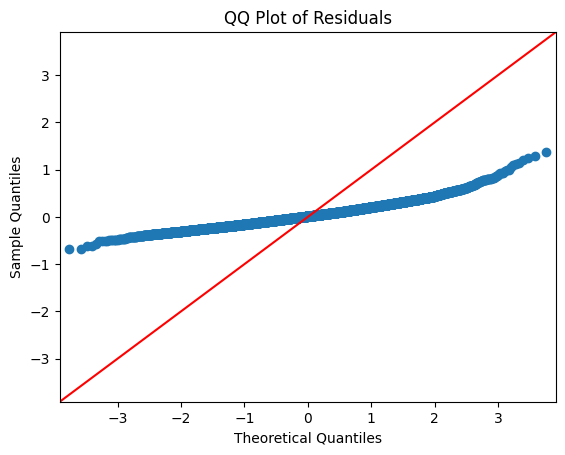

In [ ]:
sm.qqplot(residuals, line='45')
plt.title("QQ Plot of Residuals")
plt.show()

[Your inferences here:]



In [ ]:
# We can see from the Residual distribution graph that the error is noramally distributed at the center

#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [ ]:
# Compare the scaled vs unscaled features used in the final model

comparison_df = pd.DataFrame({
    "Unscaled": coeffs_unscaled,
    "Scaled": coeffs_scaled
})

print("\nCoefficient Comparison:\n", comparison_df[~comparison_df['Scaled'].isna()].sort_values(by='Scaled', ascending=False))



Coefficient Comparison:
                            Unscaled    Scaled
distance                   0.471512  0.627296
total_outstanding_orders   0.371636  0.469532
num_distinct_items         0.613381  0.254425
const                     34.893753  0.050858
market_id_5.0             -3.200440 -0.097002
market_id_3.0             -3.725909 -0.118290
market_id_6.0             -2.613820 -0.140133
market_id_4.0             -4.565292 -0.189564
market_id_2.0             -5.284255 -0.267510


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [ ]:
# Analyze the effect of a unit change in a feature, say 'total_items'


#From the final model we can observe that
# A 1 unit increase in distance increase the time taken by 0.6 units
# Similarly a 1 unit increase in total_outstanding_orders increase the time taken by 0.4 units

Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

** *italicized text*Answer:**
>Yes, there are categorical variables in the dataset.
From the dataset exploration and preprocessing steps in the notebook, the following categorical columns were found:

store_primary_category
market_id
order_protocol
isWeekend



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>

**Yes I have one category column, marketid in my final model and it has negative coeeficient with the target variable. Which means if you place order from market_id 5 it takes less time.**



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

** *italicized text*Answer:**
>>It defined the test sample size of 20% and the remaining 80% will go for train set



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

** *italicized text*Answer:**

>I have followed these two approach.
1. Finding invalid data , by understanding column specification.
2. Removing outlier Using IQR formula



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:** *italicized text*
>Based on the final model result we can see total_outstanding_orders,distance ,num_distinct_items significantly increase the delivery time



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

** *italicized text*Answer:**
>Linear Regression model is used to find relationship between a dependent variable and one or more independent variables. It provides valuable insights for prediction and data analysis.It used historical data for making predictions

There are two type of Linear Regression
1.Simple Linear Regression.
2.Multi linear Regression.




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

** *italicized text*Answer:**
>Simple Linear Regression:
In simple Linear Regression we have one target variable and one independent/predicator variable
And it use below quations.

Equation:
$y = \beta_0 + \beta_1 x + \epsilon$

Multiple Linear Regression:
In multiple Linear Regression we have one target variable and one and more independent/predicator variable
And it use below quations.

Equation:
$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n + \epsilon$




---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

** *italicized text*Answer:**
>The cost function measures how well the linear regression model's predictions match the actual data.

Quantifies the error between predicted outputs ($\hat{y}$ ) and actual outputs (𝑦).

Guides the training of the model and the goal is to minimize this error.

Ensures that the model learns the best possible coefficients




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



** *italicized text*Answer:**

>Overfitting happens when a model learns too much from the training data including details that don’t matter (like noise or outliers).
As a result the model works great on training data but fails when tested on new data

Underfitting is the opposite of overfitting. It happens when a model is too simple to capture what’s going on in the data.
In this case, the model doesn’t work well on either the training or testing data.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

** *italicized text*Answer:**
>In regression analysis, residuals refer to the differences between the observed and predicted values from the regression model. These residuals are crucial in evaluating the accuracy and appropriateness of the regression model.